In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import (MinMaxInterval, ImageNormalize)
import math

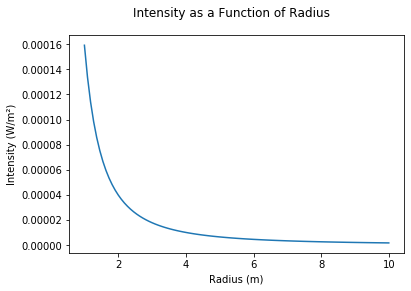

In [2]:
R = 2
B = 76
r = 10
x = np.linspace(1, r, 100)
y = 10**(B/10) * 10**-12 * R**2 / x**2

plt.xlabel('Radius (m)')
plt.ylabel('Intensity (W/m²)')
plt.suptitle('Intensity as a Function of Radius')
plt.plot(x, y)

In [3]:
#setting up matrix (size of hall)
columns = 10
rows = 15
M = np.zeros((rows, columns))

In [4]:
d = columns/2 + 0.5
x = -d
y = 0
t = 1
v = 344 #speed of sound
f = 440 #frequency
B = 76
R = 0.1
p = 1.225
a = 0.1 #sound absorption

# necessary equations
w = 2 * np.pi * f #angular velocity
P = 4 * np.pi * R**2 * 10**-12 * 10**(B/10)
Q = math.sqrt(P / (2 * np.pi * p * v * w**2))
QAbsorbed = math.sqrt(P * a / (2 * np.pi * p * v * w**2))

def r_direct (A, B):
    return math.sqrt(A**2 + B**2)
def r_13 (A, B, d):
    return d * math.sqrt(B / (2 * d + A)**2 + 1)
def r_24 (A, B, d):
    return math.sqrt((y * (2 * d + A / d))**2 + (d + B)**2)
def pathDifference (A, B, C):
    return A + B - C
def phaseDifference (path, freq, vel):
    return 2 * np.pi * path * freq / vel
def amplitude (q, r1, r2):
    return q * 1 / (r1 + r2)
def amplitude_x (amp, phd):
    return amp * np.cos(w * t + phd)
def amplitude_y (amp, phd):
    return amp * np.sin(w * t + phd)

#determining sound level at each coordinate of the hall
for i in M:
    y += 1
    for j in range(len(i)):
        x += 1
        
        rDirect = r_direct(x, y)
        r_1 = r_13(-x, y, d)
        r_2 = r_24(-x, y, d)
        r_3 = r_13(x, y, d)
        r_4 = r_24(x, y, d)
        
        pathDif_1 = pathDifference(r_1, r_2, rDirect)
        pathDif_2 = pathDifference(r_3, r_4, rDirect)
        phaseDif_1 = phaseDifference(pathDif_1, f, v)
        phaseDif_2 = phaseDifference(pathDif_2, f, v)

        amp_1 = amplitude(Q, r_1, r_2)
        ampAbsorbed_1 = amplitude(QAbsorbed, r_1, r_2)

        A1x = amplitude_x(amp_1, phaseDif_1) - amplitude_x(ampAbsorbed_1, phaseDif_1)
        A1y = amplitude_y(amp_1, phaseDif_1) - amplitude_y(ampAbsorbed_1, phaseDif_1)
        
        amp_2 = amplitude(Q, r_3, r_4)
        ampAbsorbed_2 = amplitude(QAbsorbed, r_3, r_4)

        A2x = amplitude_x(amp_2, phaseDif_2) - amplitude_x(ampAbsorbed_2, phaseDif_2)
        A2y = amplitude_y(amp_2, phaseDif_2) - amplitude_y(ampAbsorbed_2, phaseDif_2)
        ampDirect = amplitude(Q, rDirect, 0)
        ampDirect_x = amplitude_x(ampDirect, 0)
        ampDirect_y = amplitude_y(ampDirect, 0)
        
        ampTot = (A1x + A2x + ampDirect_x)**2 + (A1y + A2y + ampDirect_y)**2
        
        intensity = 0.5 * p * v * w**2 * ampTot
        i[j] = 10 * math.log(intensity / 10**-12)
    x = -d

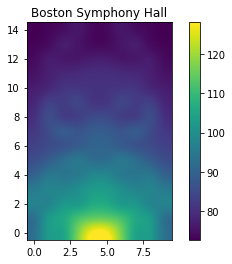

In [5]:
norm = ImageNormalize(M, interval = MinMaxInterval())
fig, ax = plt.subplots()
im = ax.imshow(M, interpolation = 'spline16', vmin = np.amin(M), vmax = np.amax(M), origin = 'lower')
fig.colorbar(im)
plt.title('Boston Symphony Hall')
plt.show()